In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/digit_recognition/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y = df['label']
X = df.drop('label', axis=1, inplace=False)

In [6]:
X.shape

(42000, 784)

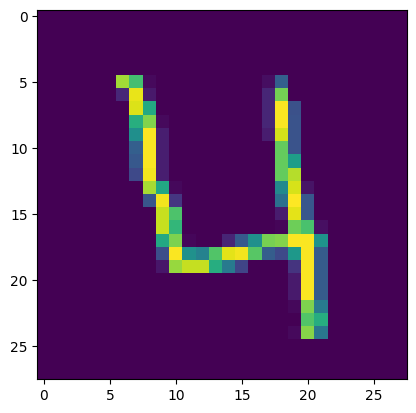

In [12]:
img = X.iloc[3].values.reshape(28,28)
plt.imshow(img)

In [13]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=18)

In [15]:
X_train.shape

(33600, 784)

In [24]:
X_train = X_train/255
X_val = X_val/255

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)

# Model Building

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                12560     
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [41]:
hist = model.fit(X_train,y_train_cat, validation_data=(X_val,y_val_cat), epochs=20, batch_size = 64)

Epoch 1/20
525/525 [==============================] - 2s 2ms/step - loss: 0.6835 - accuracy: 0.8031 - val_loss: 0.3243 - val_accuracy: 0.9086
Epoch 2/20
525/525 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.9131 - val_loss: 0.2543 - val_accuracy: 0.9245
Epoch 3/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2529 - accuracy: 0.9264 - val_loss: 0.2476 - val_accuracy: 0.9239
Epoch 4/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2275 - accuracy: 0.9334 - val_loss: 0.2154 - val_accuracy: 0.9365
Epoch 5/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2109 - accuracy: 0.9391 - val_loss: 0.2097 - val_accuracy: 0.9362
Epoch 6/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.9421 - val_loss: 0.2075 - val_accuracy: 0.9364
Epoch 7/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1892 - accuracy: 0.9453 - val_loss: 0.1960 - val_accuracy: 0.9420
Epoch 

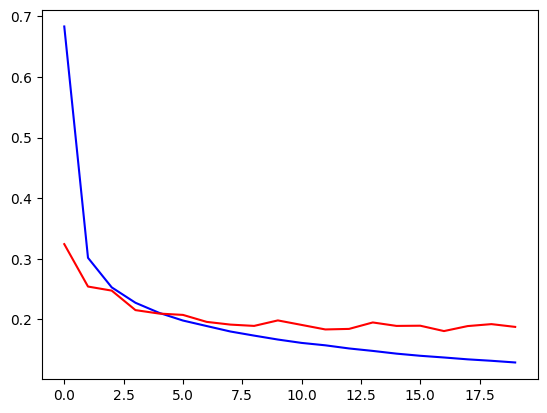

In [45]:
plt.plot(hist.history['loss'], c='blue')
plt.plot(hist.history['val_loss'], c='red')

In [50]:
ip = X_val.iloc[0].values.reshape(1,784)

In [53]:
model.predict_on_batch(ip).argmax()

8

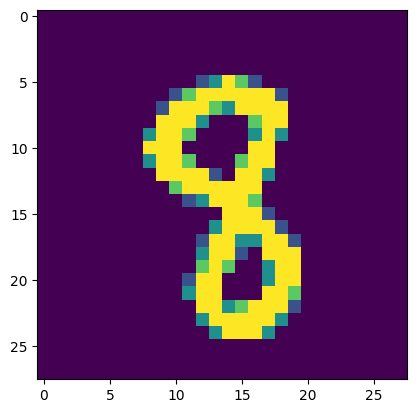

In [54]:
plt.imshow(ip.reshape(28,28))

# Predict on own images

In [55]:
import cv2

In [58]:
img = cv2.imread('../../datasets/digit_recognition/my_images/0.jpg',0)

In [59]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [61]:
img = cv2.resize(img,(28,28))

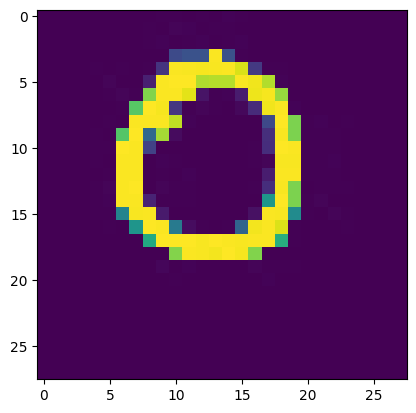

In [63]:
plt.imshow(img)

In [65]:
img = img/255

In [66]:
model.predict_on_batch(img.reshape(1,784)).argmax()

4

In [68]:
def predict_digit(path):
    img = cv2.imread(path,0)
    img = cv2.resize(img,(28,28))
    img = img/255
    return model.predict_on_batch(img.reshape(1,784)).argmax()

In [74]:
predict_digit('../../datasets/digit_recognition/my_images/3.jpg')

3

In [75]:
import os

In [77]:
image_names = os.listdir('../../datasets/digit_recognition/my_images')

In [82]:
DIR = '../../datasets/digit_recognition/my_images/'
for filename in image_names:
    print(filename, '\t',predict_digit(DIR+filename))

0.jpg 	 4
00.jpg 	 0
1.jpg 	 2
11.jpg 	 2
2.jpg 	 2
22.jpg 	 2
3.jpg 	 3
33.jpg 	 3
4.jpg 	 8
44.jpg 	 1
5.jpg 	 5
55.jpg 	 3
6.jpg 	 6
66.jpg 	 6
7.jpg 	 3
77.jpg 	 3
8.jpg 	 8
88.jpg 	 3
9.jpg 	 3
99.jpg 	 3


In [84]:
model.predict_on_batch(ip).sum()

1.0